In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [75]:
df=pd.read_csv('/content/python machine learning model xgboost - electricity demand dataset.csv')
df.head()

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006


In [76]:
df.shape

(43848, 9)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    43848 non-null  object 
 1   hour         43837 non-null  float64
 2   dayofweek    43839 non-null  float64
 3   month        43840 non-null  float64
 4   year         43843 non-null  float64
 5   dayofyear    43843 non-null  float64
 6   Temperature  43841 non-null  float64
 7   Humidity     43838 non-null  float64
 8   Demand       43841 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.0+ MB


In [78]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [79]:
df.head()

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006


In [80]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Timestamp,43848,2022-07-02 00:00:00,2020-01-01 00:00:00,2021-04-01 00:00:00,2022-07-02 00:00:00,2023-10-02 00:00:00,2024-12-31 00:00:00,NaN
hour,43837.0,11.49903,0.0,5.0,11.0,17.0,23.0,6.922006
dayofweek,43839.0,2.999795,0.0,1.0,3.0,5.0,6.0,2.000051
month,43840.0,6.521282,1.0,4.0,7.0,10.0,12.0,3.449168
year,43843.0,2022.000068,2020.0,2021.0,2022.0,2023.0,2024.0,1.415044
dayofyear,43843.0,183.208654,1.0,92.0,183.0,275.0,366.0,105.478826
Temperature,43841.0,25.067788,3.0,15.210186,25.003212,34.740971,50.0,12.821725
Humidity,43838.0,59.903007,20.0,46.241224,59.98672,73.79682,95.0,18.342604
Demand,43841.0,5000.790976,1611.95402,4015.668472,5013.053367,6000.803082,11910.7051,1412.527409


<Axes: xlabel='Temperature', ylabel='Count'>

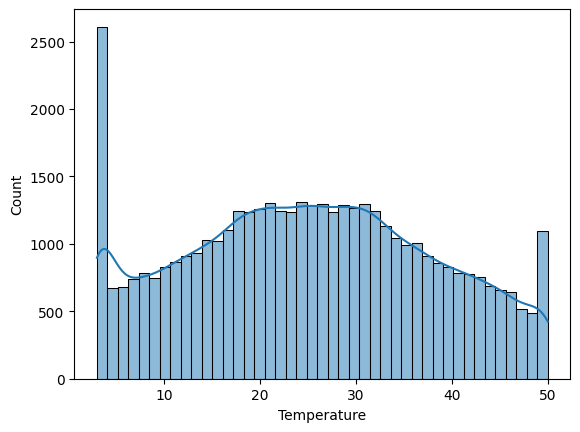

In [81]:
sns.histplot(df['Temperature'],kde=True)

<Axes: xlabel='Humidity', ylabel='Count'>

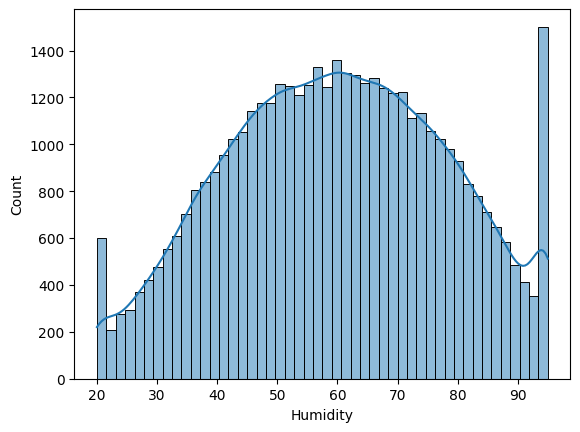

In [82]:
sns.histplot(df['Humidity'],kde=True)

<Axes: xlabel='Demand', ylabel='Count'>

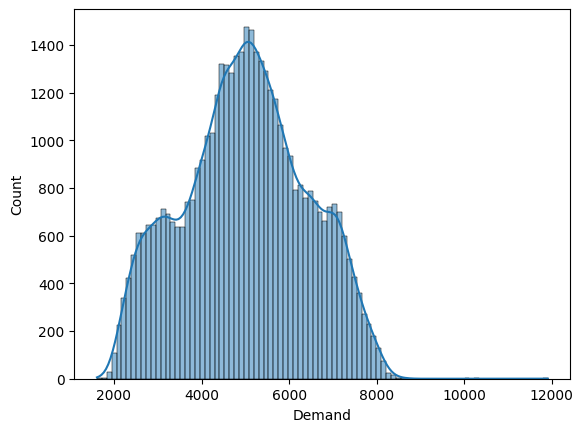

In [83]:
sns.histplot(df['Demand'],kde=True)

In [84]:
df[df.isnull().any(axis=1)]

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
2900,2020-04-30,NaN,3.0,4.0,2020.0,121.0,21.820261,41.353675,5393.127681
4854,2020-07-21,NaN,1.0,7.0,2020.0,203.0,36.555833,62.779665,6248.349423
10004,2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10005,2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10006,2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10007,2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10162,2021-02-27,NaN,5.0,2.0,2021.0,58.0,24.001003,53.303268,4523.253789
17111,2021-12-13,23.0,0.0,12.0,2021.0,NaN,3.000000,75.457130,3225.225822
17117,2021-12-14,NaN,1.0,12.0,2021.0,348.0,5.061319,47.215825,2887.848612
17126,2021-12-14,14.0,1.0,12.0,2021.0,348.0,15.403995,74.011557,NaN


In [85]:
df.dropna(how='all', inplace=True)
df.shape

(43848, 9)

In [86]:
df.isnull().sum()

,0
Timestamp,0
hour,11
dayofweek,9
month,8
year,5
dayofyear,5
Temperature,7
Humidity,10
Demand,7


In [87]:
df.head()

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006


In [88]:
df['month']=df['Timestamp'].dt.month
df['year'] = df['Timestamp'].dt.year
df['dayofweek'] = df['Timestamp'].dt.dayofweek

In [89]:
df.isnull().sum()

,0
Timestamp,0
hour,11
dayofweek,0
month,0
year,0
dayofyear,5
Temperature,7
Humidity,10
Demand,7


In [90]:
# List of columns to fill
cols_to_fill = ['Temperature', 'Humidity', 'Demand']

# Fill missing values with column mean
for col in cols_to_fill:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

# Verify
print(df[cols_to_fill].isnull().sum())


Temperature    0
Humidity       0
Demand         0
dtype: int64


In [91]:
df.isnull().sum()

,0
Timestamp,0
hour,11
dayofweek,0
month,0
year,0
dayofyear,5
Temperature,0
Humidity,0
Demand,0


In [92]:
# Fill NaNs in 'hour' by incrementing previous value + 1 and print details
for i in range(1, len(df)):
    if pd.isna(df.loc[i, 'hour']):
        prev_value = df.loc[i-1, 'hour']
        new_value = prev_value + 1
        df.loc[i, 'hour'] = new_value
        print(f"Row {i}: Previous value = {prev_value}, Filled value = {new_value}")

# Optional: convert to int
df['hour'] = df['hour'].astype(int)

print("\nUpdated 'hour' column:")
print(df['hour'])

Row 2900: Previous value = 19.0, Filled value = 20.0
Row 4854: Previous value = 5.0, Filled value = 6.0
Row 10004: Previous value = 19.0, Filled value = 20.0
Row 10005: Previous value = 20.0, Filled value = 21.0
Row 10006: Previous value = 21.0, Filled value = 22.0
Row 10007: Previous value = 22.0, Filled value = 23.0
Row 10162: Previous value = 9.0, Filled value = 10.0
Row 17117: Previous value = 4.0, Filled value = 5.0
Row 21567: Previous value = 14.0, Filled value = 15.0
Row 32109: Previous value = 20.0, Filled value = 21.0
Row 35718: Previous value = 5.0, Filled value = 6.0

Updated 'hour' column:
0         0
1         1
2         2
3         3
4         4
         ..
43843    19
43844    20
43845    21
43846    22
43847    23
Name: hour, Length: 43848, dtype: int64


In [93]:
df.isnull().sum()

,0
Timestamp,0
hour,0
dayofweek,0
month,0
year,0
dayofyear,5
Temperature,0
Humidity,0
Demand,0


In [94]:
df[df['dayofweek'].isna()]

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand


In [95]:
# Fill NaNs in 'dayofyear' by incrementing previous value + 1 and print details
for i in range(1, len(df)):
    if pd.isna(df.loc[i, 'dayofyear']):
        prev_value = df.loc[i-1, 'dayofyear']
        new_value = prev_value + 1
        df.loc[i, 'dayofyear'] = new_value
        print(f"Row {i}: Previous value = {prev_value}, Filled value = {new_value}")

# Optional: convert to int
df['dayofyear'] = df['dayofyear'].astype(int)

print("\nUpdated 'dayofyear' column:")
print(df['dayofyear'])


Row 10004: Previous value = 51.0, Filled value = 52.0
Row 10005: Previous value = 52.0, Filled value = 53.0
Row 10006: Previous value = 53.0, Filled value = 54.0
Row 10007: Previous value = 54.0, Filled value = 55.0
Row 17111: Previous value = 347.0, Filled value = 348.0

Updated 'dayofyear' column:
0          1
1          1
2          1
3          1
4          1
        ... 
43843    366
43844    366
43845    366
43846    366
43847    366
Name: dayofyear, Length: 43848, dtype: int64


In [96]:
df.isnull().sum()

,0
Timestamp,0
hour,0
dayofweek,0
month,0
year,0
dayofyear,0
Temperature,0
Humidity,0
Demand,0


In [97]:
df.head()

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,2020-01-01,0,2,1,2020,1,3.000000,61.288951,2457.119872
1,2020-01-01,1,2,1,2020,1,3.000000,52.873702,2269.904712
2,2020-01-01,2,2,1,2020,1,4.244482,36.341783,2215.640403
3,2020-01-01,3,2,1,2020,1,3.000000,72.629378,2174.232413
4,2020-01-01,4,2,1,2020,1,3.881208,90.582444,2472.453006


In [98]:
df['Temperature'] = df['Temperature'].round().astype(int)
df['Humidity'] = df['Humidity'].round().astype(int)
df['Demand'] = df['Demand'].round().astype(int)

In [99]:
  df.head()

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,2020-01-01,0,2,1,2020,1,3,61,2457
1,2020-01-01,1,2,1,2020,1,3,53,2270
2,2020-01-01,2,2,1,2020,1,4,36,2216
3,2020-01-01,3,2,1,2020,1,3,73,2174
4,2020-01-01,4,2,1,2020,1,4,91,2472


In [100]:
df.to_csv('cleaned_data_df')

In [102]:
df.head()

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,2020-01-01,0,2,1,2020,1,3,61,2457
1,2020-01-01,1,2,1,2020,1,3,53,2270
2,2020-01-01,2,2,1,2020,1,4,36,2216
3,2020-01-01,3,2,1,2020,1,3,73,2174
4,2020-01-01,4,2,1,2020,1,4,91,2472


In [105]:
df.shape

(43848, 9)

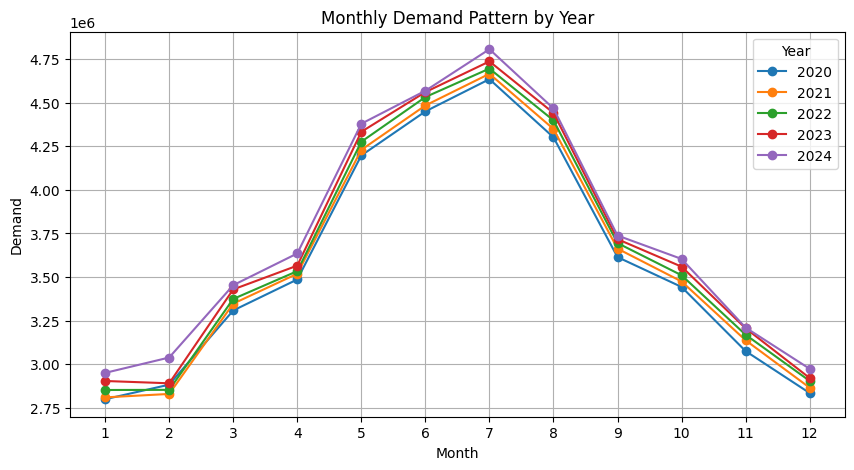

In [113]:
monthly_demand = df.groupby(['year', 'month'])['Demand'].sum().reset_index()

# Plot demand pattern for each unique year
unique_years = monthly_demand['year'].unique()

plt.figure(figsize=(10, 5))
for year in unique_years:
    data = monthly_demand[monthly_demand['year'] == year]
    plt.plot(data['month'], data['Demand'], marker='o', label=str(year))

plt.title('Monthly Demand Pattern by Year')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.xticks(range(1,13))
plt.legend(title='Year')
plt.grid(True)
plt.show()